In [1]:
# Install required packages
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import spacy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Set plot style
plt.style.use('seaborn-v0_8')

In [3]:
# Sample Amazon reviews
reviews = [
    "I absolutely love my new iPhone 14 Pro Max! The camera quality is amazing and the battery life lasts all day. Apple has really outdone themselves with this one.",
    "The Samsung Galaxy S23 Ultra is a great phone, but the price is too high. The display is beautiful though, and the S Pen is a nice addition.",
    "My experience with the Sony WH-1000XM4 headphones has been fantastic. The noise cancellation is incredible, but the touch controls can be a bit finicky sometimes.",
    "The Amazon Echo Dot is okay for basic tasks, but Alexa often misunderstands my commands. The sound quality is decent for its size though.",
    "The Dell XPS 13 laptop is a premium device with excellent build quality. However, the webcam placement is awkward and the battery life could be better."
]

# Function to extract product and brand entities
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ['PRODUCT', 'ORG']:
            entities.append((ent.text, ent.label_))
    return entities

# Function to analyze sentiment
def analyze_sentiment(text):
    # Get VADER sentiment scores
    scores = sentiment_analyzer.polarity_scores(text)

    # Determine sentiment label
    if scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, scores

In [4]:
# Create a list to store results
results = []

# Process each review
for i, review in enumerate(reviews, 1):
    # Extract entities
    entities = extract_entities(review)

    # Analyze sentiment
    sentiment, scores = analyze_sentiment(review)

    # Store results
    results.append({
        'Review': review,
        'Entities': entities,
        'Sentiment': sentiment,
        'Compound Score': scores['compound']
    })

    # Print results for each review
    print(f"\nReview {i}:")
    print("-" * 50)
    print(f"Text: {review}")
    print("\nExtracted Entities:")
    for entity, label in entities:
        print(f"- {entity} ({label})")
    print(f"\nSentiment: {sentiment}")
    print(f"Compound Score: {scores['compound']:.3f}")
    print("-" * 50)


Review 1:
--------------------------------------------------
Text: I absolutely love my new iPhone 14 Pro Max! The camera quality is amazing and the battery life lasts all day. Apple has really outdone themselves with this one.

Extracted Entities:
- Apple (ORG)

Sentiment: Positive
Compound Score: 0.862
--------------------------------------------------

Review 2:
--------------------------------------------------
Text: The Samsung Galaxy S23 Ultra is a great phone, but the price is too high. The display is beautiful though, and the S Pen is a nice addition.

Extracted Entities:
- the S Pen (ORG)

Sentiment: Positive
Compound Score: 0.912
--------------------------------------------------

Review 3:
--------------------------------------------------
Text: My experience with the Sony WH-1000XM4 headphones has been fantastic. The noise cancellation is incredible, but the touch controls can be a bit finicky sometimes.

Extracted Entities:
- Sony (ORG)

Sentiment: Positive
Compound Score

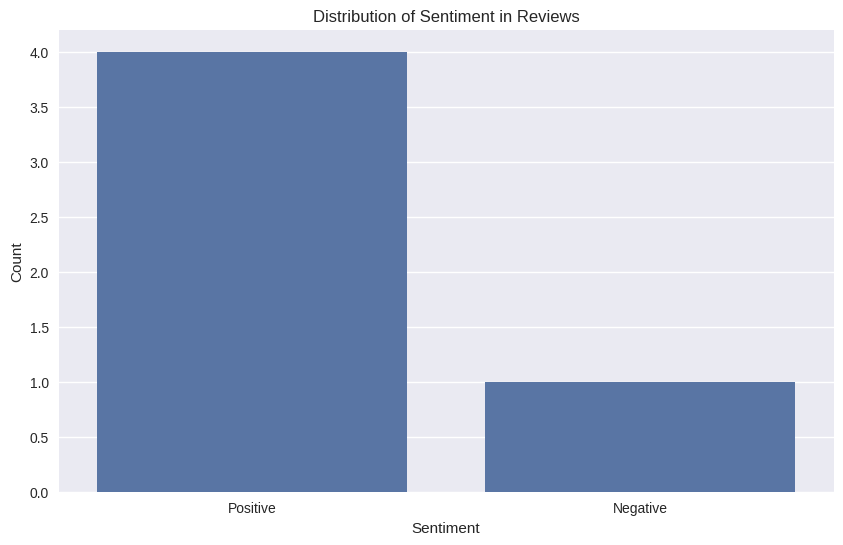

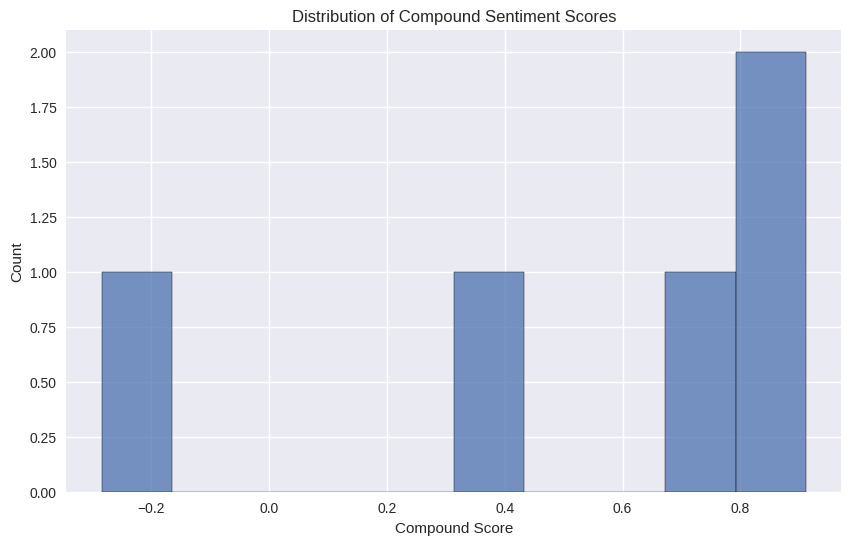

In [5]:
# Convert results to DataFrame
df = pd.DataFrame(results)

# Create sentiment distribution plot
plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create compound score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Compound Score', bins=10)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.show()

In [6]:
# Print summary statistics
print("Summary Statistics:")
print("-" * 50)
print(f"Total Reviews: {len(df)}")
print(f"Average Compound Score: {df['Compound Score'].mean():.3f}")
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Print all unique entities found
print("\nUnique Entities Found:")
all_entities = set()
for entities in df['Entities']:
    for entity, label in entities:
        all_entities.add(f"{entity} ({label})")
for entity in sorted(all_entities):
    print(f"- {entity}")

Summary Statistics:
--------------------------------------------------
Total Reviews: 5
Average Compound Score: 0.505

Sentiment Distribution:
Sentiment
Positive    4
Negative    1
Name: count, dtype: int64

Unique Entities Found:
- Alexa (ORG)
- Apple (ORG)
- Sony (ORG)
- the S Pen (ORG)
